In [1]:
# Python library and module imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py
import torch

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils

# WatChMaL imports
from io_utils.data_handling import WCH5Dataset

# Use the dataloader to load the dataset

In [2]:
dset=WCH5Dataset("/fast_scratch/WatChMaL/data/IWCDmPMT/varyE/IWCDmPMT_varyE_100-1000MeV_300k_fmt.h5",
                 0.1,
                 0.1,
                 shuffle=True,
                 reduced_dataset_size=5000)

In [3]:
print(len(dset))

5000


In [8]:
data = next(iter(dset))
print(len(data))

4


In [10]:
print(data[0].shape)
print(data[1].shape)
print(data[2])
print(data[3])

(16, 40, 38)
()
0
[523.95337]


In [4]:
event_data = [0 for i in range(len(dset))]

for i in range(len(dset)):
    data = next(iter(dset))
    event_data[i] = data[0]

In [5]:
event_data = np.array(event_data)
print(event_data.shape)

(5000, 16, 40, 38)


In [6]:
data = event_data
print(data.shape)

(5000, 16, 40, 38)


In [7]:
charge_data = data[:,:,:,:19]
timing_data = data[:,:,:,19:]

print(charge_data.shape)
print(timing_data.shape)

(5000, 16, 40, 19)
(5000, 16, 40, 19)


In [9]:
single_event_charge_data = charge_data[1000]
single_event_timing_data = timing_data[1000]

print(single_event_charge_data.shape)
print(single_event_timing_data.shape)

# Reshape the arrays into 1D
charge_data = charge_data.reshape(charge_data.shape[0]*charge_data.shape[1]*charge_data.shape[2]*charge_data.shape[3], -1)
timing_data = timing_data.reshape(timing_data.shape[0]*timing_data.shape[1]*timing_data.shape[2]*timing_data.shape[3], -1)

single_event_charge_data = single_event_charge_data.reshape(single_event_charge_data.shape[0]*single_event_charge_data.shape[1]*single_event_charge_data.shape[2], -1)
single_event_timing_data = single_event_timing_data.reshape(single_event_timing_data.shape[0]*single_event_timing_data.shape[1]*single_event_timing_data.shape[2], -1)

(16, 40, 19)
(16, 40, 19)


In [10]:
print(charge_data.shape)
print(timing_data.shape)

(60800000, 1)
(60800000, 1)


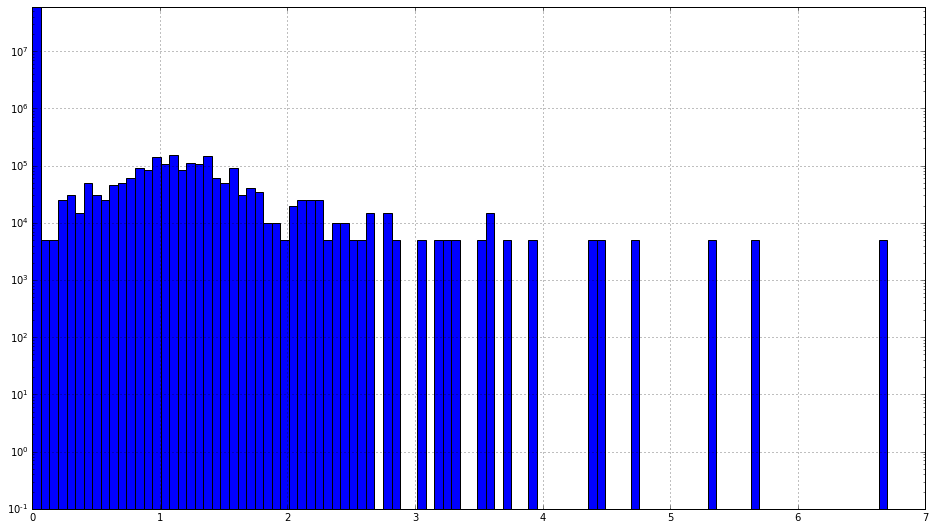

In [12]:
fig = plt.figure(figsize=(16,9))
plt.hist(charge_data, bins=100)
plt.grid(True)
plt.ylim(0.1)
plt.yscale('log')

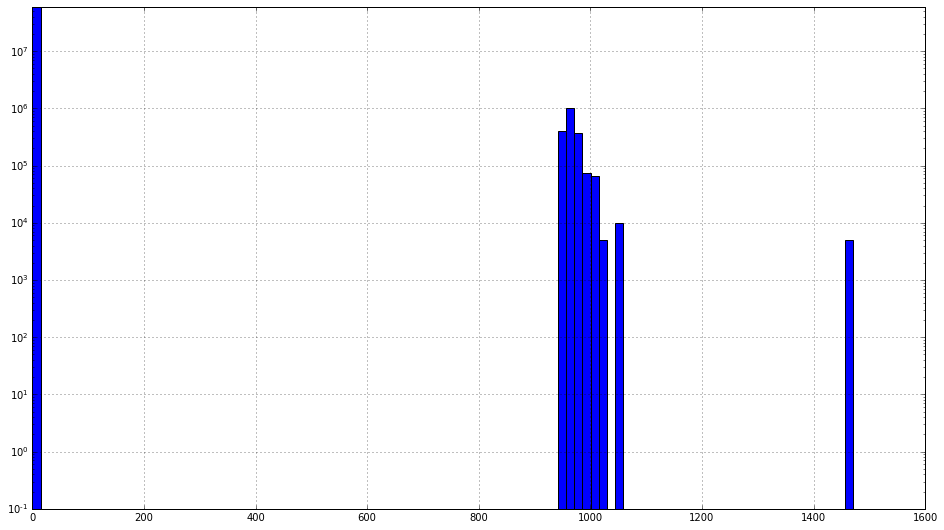

In [13]:
fig = plt.figure(figsize=(16,9))
plt.hist(timing_data, bins=100)
plt.grid(True)
plt.ylim(0.1)
plt.yscale('log')

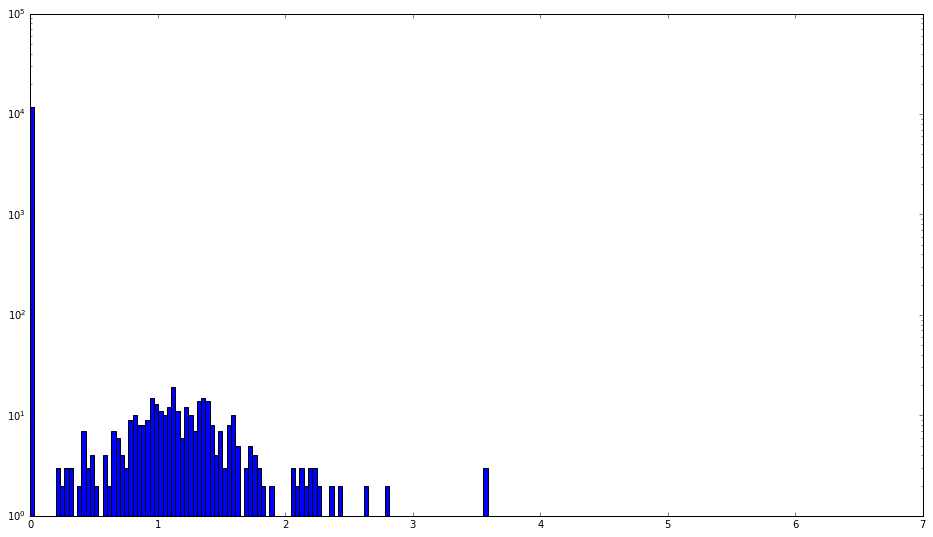

In [36]:
fig = plt.figure(figsize=(16,9))
plt.hist(single_event_charge_data, bins=200)
plt.yscale('log')

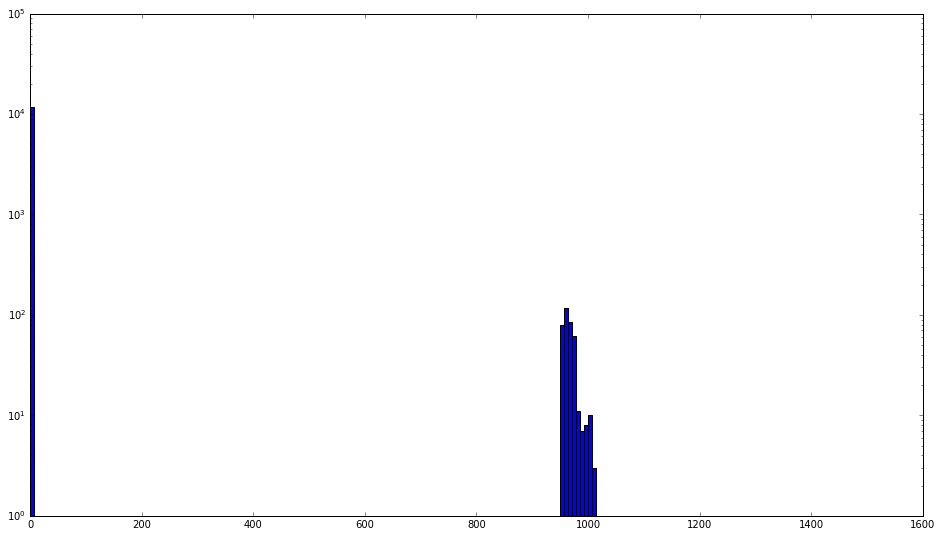

In [37]:
fig = plt.figure(figsize=(16,9))
plt.hist(single_event_timing_data, bins=200)
plt.yscale('log')

## Using only the hit PMTs for finding the distribution

In [43]:
hit_charge_data = charge_data[charge_data != 0]
hit_timing_data = timing_data[charge_data != 0]

In [63]:
print(hit_charge_data.shape)
print(hit_timing_data.shape)

(19350000,)
(19350000,)


In [64]:
print(min(hit_charge_data))
print(min(hit_timing_data))

0.12825873
952.0


In [65]:
print(max(hit_charge_data))
print(max(hit_timing_data))

6.704638
1471.1


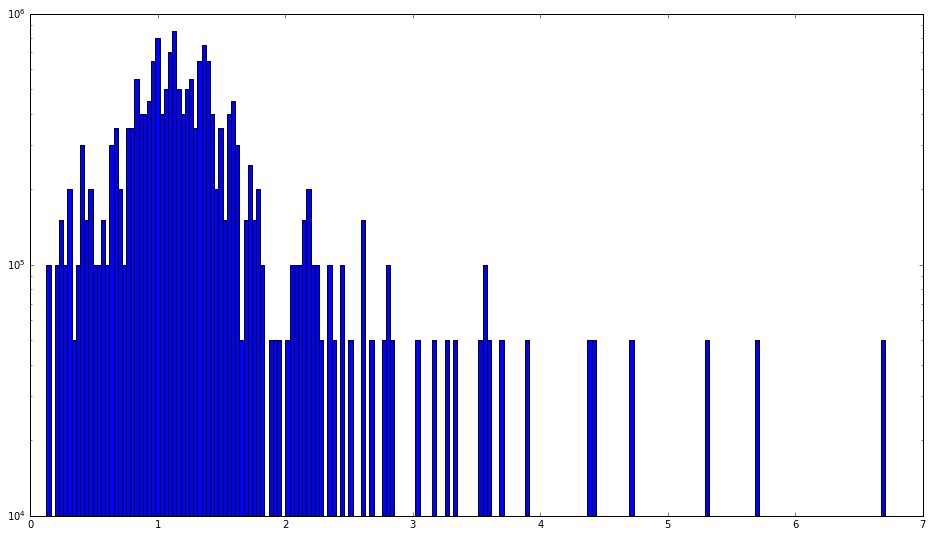

In [66]:
fig = plt.figure(figsize=(16,9))
plt.hist(hit_charge_data, bins=200)
plt.yscale('log')

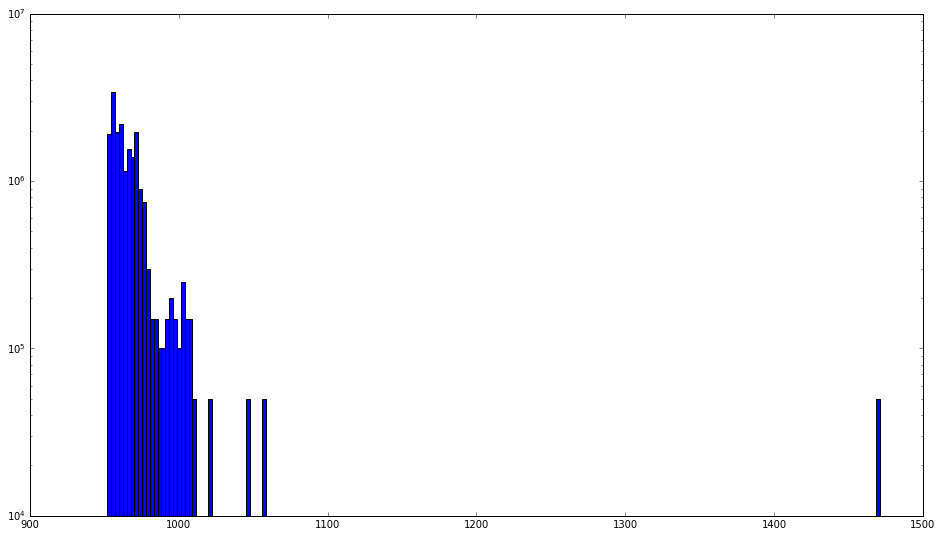

In [67]:
fig = plt.figure(figsize=(16,9))
plt.hist(hit_timing_data, bins=200)
plt.ylim(0.1, 1000000)
plt.yscale('log')

## Remove the unhit PMTs from the single event data

In [76]:
print(single_event_charge_data.shape)
print(single_event_timing_data.shape)

(12160, 1)
(12160, 1)


In [77]:
single_event_hit_charge_data = single_event_charge_data[single_event_charge_data != 0]
single_event_hit_timing_data = single_event_timing_data[single_event_charge_data != 0]

In [78]:
print(single_event_hit_charge_data.shape)
print(single_event_hit_timing_data.shape)

(387,)
(387,)


In [79]:
print(min(single_event_hit_charge_data))
print(min(single_event_hit_timing_data))

0.12825873
952.0


In [80]:
print(max(single_event_hit_charge_data))
print(max(single_event_hit_timing_data))

6.704638
1471.1


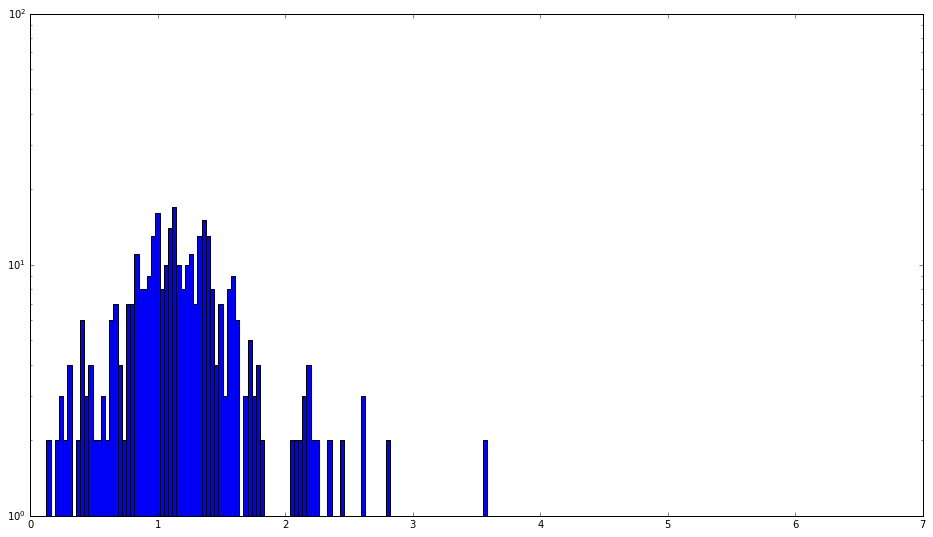

In [55]:
fig = plt.figure(figsize=(16,9))
plt.hist(single_event_hit_charge_data, bins=200)
plt.yscale('log')

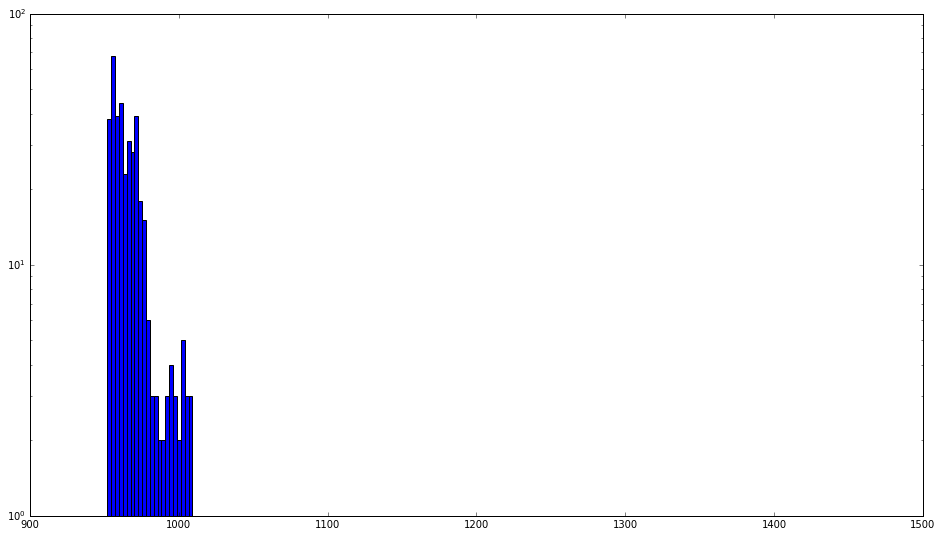

In [56]:
fig = plt.figure(figsize=(16,9))
plt.hist(single_event_hit_timing_data, bins=200)
plt.yscale('log')